## Cargar los datos

In [17]:
import numpy as np
import pandas as pd

# Cargar datos
df = pd.read_csv('../Laboratorio1/PRSA_Data_Guanyuan_20130301-20170228.csv')

# Elimina filas donde y (PM2.5) tiene valores NaN
df = df.dropna(subset=['PM2.5'])

# Imputa valores NaN solo en columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

## Procesar los datos

In [18]:
X = df[['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].values
y = df['PM2.5'].values

### Normalizar las características

In [19]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)

print(X_norm)

[[-1.15456823 -0.15173668 -1.0848225  ... -1.59780375 -0.07368526
   2.23745711]
 [-1.15456823 -0.19417952 -1.17082102 ... -1.55394749 -0.07368526
   2.4868335 ]
 [-1.16557485 -0.32150801 -1.11348867 ... -1.55394749 -0.07368526
   3.23496265]
 ...
 [-0.83537634 -0.53372217 -0.54016521 ... -1.19578807 -0.07368526
  -0.50568311]
 [-0.9344359  -0.53372217 -0.31083582 ... -1.16655056 -0.07368526
  -0.42255765]
 [-0.90141605 -0.53372217 -0.13883878 ... -1.38583184 -0.07368526
  -0.33943218]]


### Extender las características (Opcional)

In [20]:
X_poly = np.concatenate([X_norm, X_norm**2], axis=1)

### Descenso por el Gradiente

In [22]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] # número de ejemplos de entrenamiento
    J = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
    return J

In [26]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # número de ejemplos de entrenamiento
    J_history = []  # para almacenar el costo en cada iteración

    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        descent = alpha * (1/m) * (X.T.dot(errors))
        theta -= descent
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


### Seleccionando Cohecieintes de Aprendizaje

In [31]:
# Añadir el término de intersección a X_poly
X_poly = np.concatenate([np.ones((X_poly.shape[0], 1)), X_poly], axis=1)

# Inicialización de theta con ceros
# +1 en la dimensión es por el término de intersección
theta = np.zeros(X_poly.shape[1])

# Configuración de la tasa de aprendizaje y número de iteraciones
alpha = 0.03
num_iters = 10000

for i in range(num_iters):
    # Opcional: Reducir alpha con el tiempo si es necesario
    if i % 1000 == 0 and i > 0:  # Cada 1000 iteraciones, reduce alpha
        alpha = alpha / 2

# Ejecutar el descenso por el gradiente para encontrar los parámetros óptimos
theta, J_history = gradientDescentMulti(X_poly, y, theta, alpha, num_iters)

### Graficar la convergencia del Costo

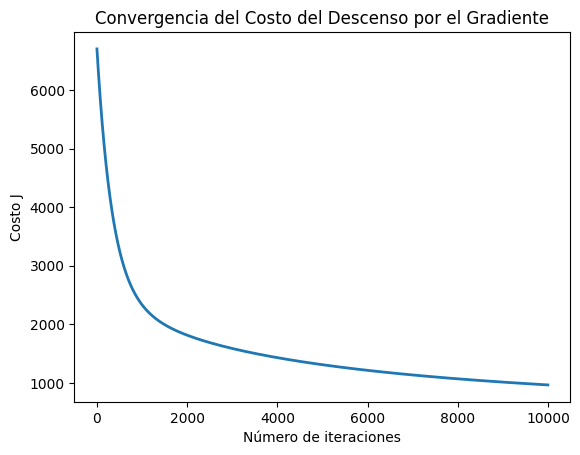

theta calculado por el descenso por el gradiente: [10.05849656 10.05849656 10.05849656 10.05849656 14.22675695  4.37670193
  9.9035487   8.70835862 -3.31629563 -0.04901482 -1.37006257  6.15998828
 -0.28383846 -6.55906128  7.45692504  1.30407603  8.48292897  2.16156311
  5.92352015  3.9498021   2.16424576  3.57881091  0.02540973  0.45415395]


In [32]:
import matplotlib.pyplot as plt

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del Costo del Descenso por el Gradiente')
plt.show()

print('theta calculado por el descenso por el gradiente:', theta)

### Realizando la compración con la temperatura

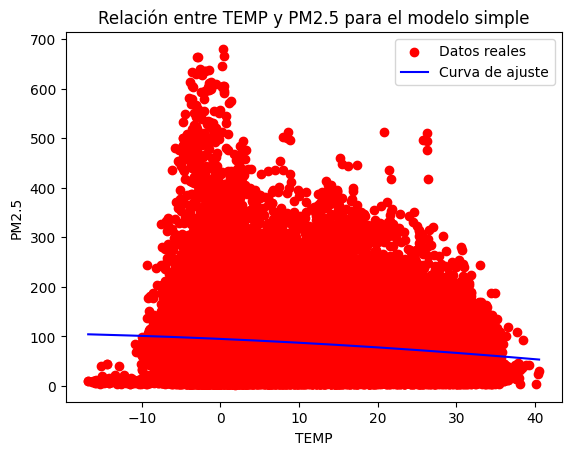

In [49]:
TEMP = df['TEMP'].values
PM25 = df['PM2.5'].values  # La variable objetivo

# Calcular theta para este modelo
X_simple = np.column_stack((np.ones(len(TEMP)), TEMP, TEMP**2))
theta_simple = normalEqn(X_simple, PM25)

# Ahora podemos calcular los valores predichos de PM2.5 para este modelo simple
predicted_PM25_simple = X_simple.dot(theta_simple)

# Graficar los datos reales
plt.scatter(TEMP, PM25, color='red', label='Datos reales')

# Graficar la línea de regresión para el modelo simple
sorted_order = np.argsort(TEMP)
plt.plot(TEMP[sorted_order], predicted_PM25_simple[sorted_order], color='blue', label='Curva de ajuste')

# Agregar etiquetas y leyenda
plt.xlabel('TEMP')
plt.ylabel('PM2.5')
plt.title('Relación entre TEMP y PM2.5 para el modelo simple')
plt.legend()
plt.show()

### Ecuación de la Normal

In [43]:
# Cargar los datos
df = pd.read_csv('../Laboratorio1/PRSA_Data_Guanyuan_20130301-20170228.csv')

# Elimina filas donde y (PM2.5) tiene valores NaN
df = df.dropna(subset=['PM2.5'])

# Imputa valores NaN solo en columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Seleccionar variables de entrada y salida
X = df[['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].values
y = df['PM2.5'].values

# Añadir término de intersección a X
m = len(y)  # Número de ejemplos de entrenamiento
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [44]:
def normalEqn(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normalEqn(X, y)

print('Theta calculado a partir de la ecuación de la normal:', theta)

Theta calculado a partir de la ecuación de la normal: [-5.98420729e+02  5.69399503e-01  9.25822402e-02  1.69746842e-01
  1.74679842e-02  1.21007584e-01 -1.10204715e+00  5.83016944e-01
  1.44520491e+00  1.65913097e-01 -1.26668038e-01]


In [45]:
# Ejemplo hipotético de características para predicción
ejemplo_features = np.array([50, 10, 20, 800, 60, 20, 1010, 10, 0, 1.5])

ejemplo_features = np.insert(ejemplo_features, 0, 1)

precio_predicho = np.dot(ejemplo_features, theta)
print('Concentración de PM2.5 predicha para el ejemplo dado:', precio_predicho)

Concentración de PM2.5 predicha para el ejemplo dado: 36.67306577407631
